In [ ]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

Confusion Matrix:
 [[  64 5870]
 [  39 5930]]

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.01      0.02      5934
           1       0.50      0.99      0.67      5969

    accuracy                           0.50     11903
   macro avg       0.56      0.50      0.34     11903
weighted avg       0.56      0.50      0.35     11903


Precision: 0.5025
Recall: 0.9935
F1 Score: 0.6675
AUC-ROC: 0.5021


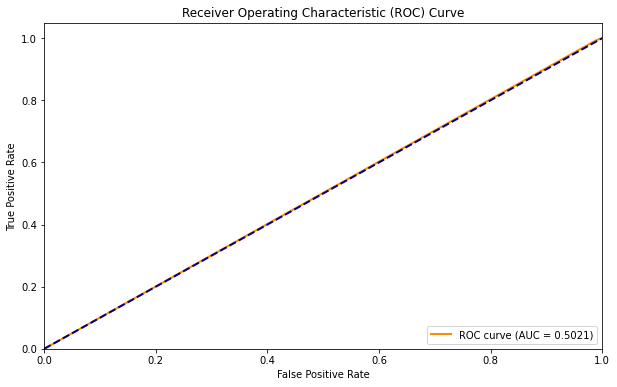

In [6]:
#Isolation Forest for Undersampling

# Load preprocessed data
df = pd.read_csv("Preprocessed Data- Undersampling.csv", dtype={'Zip': str})

#Target Column: 'Is Fraud?'
X = df.drop('Is Fraud?', axis=1)
y = df['Is Fraud?']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train an Isolation Forest model
model = IsolationForest(contamination=0.01)  # Adjust contamination based on your dataset
model.fit(X_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Convert predictions to binary labels (1 for inliers, -1 for outliers)
y_pred_binary = [1 if pred == 1 else 0 for pred in y_pred]

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_binary))
print("\nClassification Report:\n", classification_report(y_test, y_pred_binary))

# Additional evaluation metrics
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
roc_auc = roc_auc_score(y_test, y_pred_binary)

# Print additional metrics
print(f"\nPrecision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC-ROC: {roc_auc:.4f}")

fpr, tpr, thresholds = roc_curve(y_test, y_pred_binary)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.4f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Confusion Matrix:
 [[ 562597 3332797]
 [ 217044 3681885]]

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.14      0.24   3895394
           1       0.52      0.94      0.67   3898929

    accuracy                           0.54   7794323
   macro avg       0.62      0.54      0.46   7794323
weighted avg       0.62      0.54      0.46   7794323


Precision: 0.5249
Recall: 0.9443
F1 Score: 0.6747
AUC-ROC: 0.5444


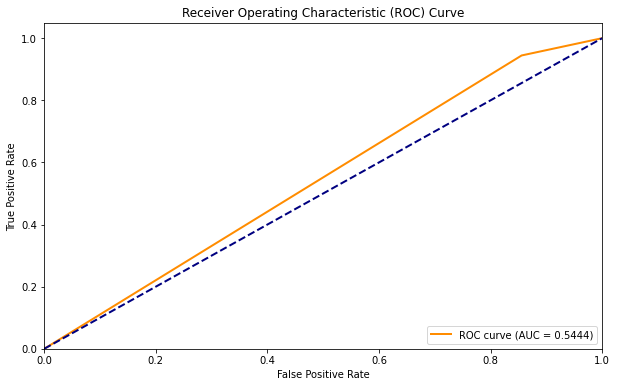

In [2]:
#Isolation Forest for Smote

# Load preprocessed data
df = pd.read_csv("Preprocessed Data- Smote.csv", dtype={'Zip': str})

#Target Column: 'Is Fraud?'
X = df.drop('Is Fraud?', axis=1)
y = df['Is Fraud?']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train an Isolation Forest model
model = IsolationForest(contamination=0.1)  # Adjust contamination based on your dataset
model.fit(X_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Convert predictions to binary labels (1 for inliers, -1 for outliers)
y_pred_binary = [1 if pred == 1 else 0 for pred in y_pred]

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_binary))
print("\nClassification Report:\n", classification_report(y_test, y_pred_binary))

# Additional evaluation metrics
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
roc_auc = roc_auc_score(y_test, y_pred_binary)

# Print additional metrics
print(f"\nPrecision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC-ROC: {roc_auc:.4f}")

fpr, tpr, thresholds = roc_curve(y_test, y_pred_binary)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.4f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()